In this notebook we are going to discuss a vast majority of the pandas Library using numerous Examples.

<div>
<img src="https://pandas.pydata.org/static/img/pandas.svg" width="500"/>
</div>

# About pandas
## History of development
In 2008, pandas development began at [AQR Capital Management](https://www.aqr.com/). By the end of 2009 it had been open sourced, and is actively supported today by a community of like-minded individuals around the world who contribute their valuable time and energy to help make open source pandas possible.

Since 2015, pandas is a [NumFOCUS sponsored project](https://numfocus.org/sponsored-projects). This will help ensure the success of development of pandas as a world-class open-source project.

## Library Highlights
- A fast and efficient **DataFrame** object for data manipulation with integrated indexing;
- Tools for r**eading and writing data** between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
- Intelligent **data alignment** and integrated handling of **missing data**: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
- Flexible **reshaping** and pivoting of data sets;
- Intelligent label-based **slicing**, **fancy indexing**, and **subsetting** of large data sets;
- Columns can be inserted and deleted from data structures for **size mutability**;
- Aggregating or transforming data with a powerful **group by** engine allowing split-apply-combine operations on data sets;
- High performance **merging and joining** of data sets;
- **Hierarchical axis indexing** provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- **Time series**-functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- Highly **optimized for performance**, with critical code paths written in Cython or C.
- Python with pandas is in use in a wide variety of **academic and commercial** domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

# <a id='main'>Table of Contents</a>
- [Series](#S)
- [DataFrames](#DF)
- [Creating DataFrames](#CDF)
- [Editing & Retrieving Data](#E&RD)
- [Conditional Selection](#CS)
- [File Input / Output](#FIO)
- [Basics & Math](#B&M)
- [Group Data](#GD)
- [Concatenate Merge & Join Data](#CM&JD)
- [Statistics](#ST)
- [Iteration](#I)
- [Sorting](#SO)
- [Passing Data to Functions](#PDTF)
- [Aligning, Reindexing and Renaming Labels](#ARARL)
- [MultiIndex](#M)
- [Handling Missing Data](#HMD)
- [Experimenting with Data](#EWD)
- [Visualization](#V)

# <a id='S'>Series</a>
[Go back to the main page](#main)

One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object supports both integer- and label-based indexing and provides a host of methods for performing operations involving the index. Statistical methods from ndarray have been overridden to automatically exclude missing data (currently represented as NaN).

Operations between Series (+, -, /, , *) align values based on their associated index values– they need not be the same length. The result index will be the sorted union of the two indexes.

In [1]:
import numpy as np
import pandas as pd

# Pandas uses something called a dataframe. It is a 
# 2D data structure that can hold multiple data types.
# Columns have labels.

# Series are built on top of NumPy arrays. 
# Create a series by first creating a list
list_1 = ['a', 'b', 'c', 'd']
# I can define that I want the series indexes to be the
# provided labels
labels = [1, 2, 3, 4]
ser_1 = pd.Series(data=list_1, index=labels)

# You can also add a NumPy array
arr_1 = np.array([1, 2, 3, 4])
ser_2 = pd.Series(arr_1)

# You can quickly add labels and values with a dictionary
dict_1 = {"f_name": "Derek", 
              "l_name": "Banas", 
              "age": 44}
ser_3 = pd.Series(dict_1)

# Get data by label
ser_3["f_name"]

# You can get the datatype
ser_2.dtype

# You can perform math operations on series
ser_2 + ser_2
ser_2 - ser_2
ser_2 * ser_2
ser_2 / ser_2

# You can pass them into NumPy methods
# See NumPy tutorial for more math methods
np.exp(ser_2)

# The difference between Series and ndarray is that operations
# align by labels
# Create a series from a dictionary
ser_4 = pd.Series({4: 5, 5: 6, 6: 7, 7: 8})
# If labels don't align you will get NaN
ser_2 + ser_4

# You can assign names to series
ser_4 = pd.Series({8: 9, 9: 10}, name='rand_nums')
ser_4.name

'rand_nums'

# <a id='DF'>Dataframe</a>
[Go back to the main page](#main)

Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

# <a id='CDF'>Creating Dataframe</a>
[Go back to the main page](#main)

In [2]:
from numpy import random

# Create random matrix 2x3 with values between 10 and 50
arr_2 = np.random.randint(10, 50, size=(2, 3))

# Create DF with data, row labels & column labels
df_1 = pd.DataFrame(arr_2, ['A', 'B'], ['C', 'D', 'E'])

# Create a DF from multiple series in a dict
# If series are of different lengthes extra spaces are NaN
dict_3 = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
         'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df_2 = pd.DataFrame(dict_3)
df_2

# from_dict accepts a column labels and lists
pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4,5,6])]))

# You can assign the keys as row labels and column labels separate
# with orient='index'
pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4,5,6])]),
                      orient='index', columns=['one','two','three'])

# Get number of rows and columns as tuple
print(df_1.shape)

(2, 3)


# <a id='E&RD'>Editing & Retrieving Data</a>
[Go back to the main page](#main)

In [3]:
# Grab a column
df_1['C']
# Get multiple columns
df_1[['C', 'E']]

# Grabb a row as a series
df_1.loc['A']
# Grab row by index position
df_1.iloc[1]

# Grab cell with Row & Column
df_1.loc['A', 'C']
# Grab multiple cells by defining rows wanted & the
# columns from those rows
print(df_1.loc[['A', 'B'], ['D', 'E']])

# Make new column
df_1['Total'] = df_1['C'] + df_1['D'] + df_1['E']
df_1

# You can perform multiple calculations
df_2['mult'] = df_2['one'] * df_2['two']
df_2

# Make a new row by appending
dict_2 = {'C': 44, 'D': 45, 'E': 46}
new_row = pd.Series(dict_2, name='F')
df_1 = df_1.append(new_row)

# Delete column and set inplace to True which is required
# because Pandas tries to help you not delete data
# by accident
df_1.drop('Total', axis=1, inplace=True)
df_1
# Delete a row
df_1.drop('B', axis=0, inplace=True)
df_1

# Create a new column and make it the index
df_1['Sex'] = ['Men', 'Women']
df_1.set_index('Sex', inplace=True)

# You can reset index values to numbers
#df_1.reset_index(inplace=True)
df_1

# Assign can be used to create a column while leaving the
# original DF untouched
df_2.assign(div=df_2['one'] / df_2['two'])

# You can pass in a function as well
df_2.assign(div=lambda x: (x['one'] / x['two']))

# Combine DataFrames while keeping df_3 data unless
# there is a NaN value
df_3 = pd.DataFrame({'A': [1., np.nan, 3., np.nan]})
df_4 = pd.DataFrame({'A': [8., 9., 2., 4.]})
df_3.combine_first(df_4)

    D   E
A  49  42
B  46  10


,A
0,1.0
1,9.0
2,3.0
3,4.0


# <a id='CS'>Conditional Selection</a>
[Go back to the main page](#main)

In [4]:
arr_2 = np.random.randint(10, 50, size=(2, 3))
df_1 = pd.DataFrame(arr_2, ['A', 'B'], ['C', 'D', 'E'])
print(df_1)

# You can use conditional operators to retrieve a table
# based on the condition
print("Greater than 40\n", df_1 > 40.0)

# You can use comparison operater functions as well like
# gt, lt, ge, le, eq, ne
print("Greater than 45\n", df_1.gt(45.0))

# You can place conditions in brackets as well
bool_1 = df_1 >= 45.0
df_1[bool_1]

# Get bools for a column
df_1['E'] > 40

# Return a row if cell value in column matches a condition
df_1[df_1['E']>30]

# You can focus on a column based on resulting dataframe
df_2 = df_1[df_1['E']>30]
df_2['C']

# You can stack these commands
print(df_1[df_1['E']>20]['C'])
print()

# You can also grab multiple columns
print(df_1[df_1['E']>20][['C', 'D']])
print()

# You can use multiple conditions
arr_3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
df_2 = pd.DataFrame(arr_3, ['A', 'B', 'C'], ['X', 'Y', 'Z'])
print(df_2, "\n")
# You can use or | to combine conditions as well
df_2[(df_2['X']>3) & (df_2['X']<7)]

    C   D   E
A  42  35  23
B  16  49  27
Greater than 40
        C      D      E
A   True  False  False
B  False   True  False
Greater than 45
        C      D      E
A  False  False  False
B  False   True  False
A    42
B    16
Name: C, dtype: int64

    C   D
A  42  35
B  16  49

   X  Y  Z
A  1  2  3
B  4  5  6
C  7  8  9 



,X,Y,Z
B,4,5,6


# <a id='FIO'>File Input / Output</a>
[Go back to the main page](#main)

Pandas can work with the following types of data : Pickling, Flat file, Clipboard, Excel, JSON, HTML, HDFStore: PyTables (HDF5), Feather, Parquet, ORC, SAS, SPSS, SQL, Google BigQuery, STATA

### [Here Check it out!](https://pandas.pydata.org/pandas-docs/stable/reference/io.html#feather)

In [5]:
!pip install pymysql

     |████████████████████████████████| 47 kB 113 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
import pymysql

# Read a CSV file
# Type pd.read_ [TAB] to see the file types you can read
cs_df = pd.read_csv('../input/icecreamsales/ComputerSales.csv')

# Save a CSV file, but don't save the index as a column
# cs_df.to_csv('ComputerSalesBU.csv', index=False)

# You can read data from Excel, but not formulas and macros
pd.read_excel('../input/icecreamsales/Financial Sample.xlsx',0)

# Write to Excel
# cs_df.to_excel('ComputerSales.xlsx')

# Check if written
# pd.read_excel('ComputerSales.xlsx',0)

# Read from MySQL Database
# try:
#     db_connection = pymysql.connect(db='students', user='studentadmin', passwd='TurtleDove', host='localhost', port=3306)

#     stud_df = pd.read_sql('SELECT * FROM students', con=db_connection)
#     # print(stud_df)
# except Exception as e:
#     print("Exception : {}".format(e))
# finally:
#     db_connection.close()
    

# Write to table 
# try:
#     db_connection = pymysql.connect(db='students', user='studentadmin', passwd='TurtleDove', host='localhost', port=3306)
#     # Used to issue queries
#     cursor = db_connection.cursor()
#     # Query to enter new student
#     insert_stmt = "INSERT INTO students VALUES(NULL, 'Frank', 'Silva', 'fsilva@aol.com', '666 Hell St', 'Yakima', 'WA', 98901, '792-223-8966', '1959-2-22', 'M', NOW(), 3.50)"
#     # Execute query
#     cursor.execute(insert_stmt)
#     # Commit changes to DB
#     db_connection.commit()
#     stud_df = pd.read_sql('SELECT * FROM students', con=db_connection)
#     print(stud_df)
# except Exception as e:
#     print("Exception : {}".format(e))
# finally:
#     db_connection.close()

# Just get 1 column of data 
cs_df_st = pd.read_csv('../input/icecreamsales/ComputerSales.csv', usecols=["State"], squeeze=True)
cs_df_st

0     OH
1     WV
2     PA
3     PA
4     PA
5     PA
6     OH
7     OH
8     OH
9     WV
10    PA
11    OH
12    PA
13    PA
14    OH
15    PA
16    OH
17    NY
18    PA
19    NY
20    PA
21    PA
22    OH
23    WV
24    NY
25    PA
26    OH
27    PA
28    PA
29    WV
30    PA
31    OH
32    PA
33    OH
34    NY
35    NY
36    PA
37    PA
38    PA
Name: State, dtype: object

# <a id='B&M'>Basics & Math</a>
[Go back to the main page](#main)

In [7]:
# Display 1st 5 rows
cs_df.head()
# Display last 5 rows
cs_df.tail()
# Get 1st 2
cs_df[:2]
# Get 1st through 5 with a 2 step
cs_df[:5:2]

# Get indexes
cs_df.index.array
# Get NumPy array
cs_df.to_numpy()
# Get array from series
ser_1.array

dict_3 = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
         'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df_2 = pd.DataFrame(dict_3)

# You can replace NaN values with 0 or anything else
print(df_2.fillna(0))
# Get values in row 2
row = df_2.iloc[1]
# Add items in row 2 to all rows including row 2
# You can do the same with sub, mul, and div
df_2.add(row, axis='columns')

# Get column 2
col = df_2['two']
# Subtract from other columns
df_2.sub(col, axis=0)

# Check if empty
df_2.empty

# Transform executes a function on a dataframe
df_5 = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df_5.transform(lambda x: x+1)
df_5.transform(lambda x: x**2)
df_5.transform(lambda x: np.sqrt(x))
# You can transform using multiple functions
df_5.transform([lambda x: x**2, lambda x: x**3])
# Passing a dictionary allows you to perform different calculations
# on different columns
df_5.transform({'A': lambda x: x**2, 'B': lambda x: x**3})

# map performs a function on a series
df_5['A'].map(lambda x: x**2)

# applymap does the same on a dataframe
df_5.applymap(lambda x: x**2)

# Get unique values in column 2 of DF
df_2['two'].unique()

# Get number of uniques
df_2['two'].nunique()

# Get the number of times each value showed in column 2
df_2['two'].value_counts()

# Get column names
df_2.columns

# Get index info
df_2.index

# Return a DF that lists null values as True
df_2.isnull()

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  0.0  4.0


,one,two
a,False,False
b,False,False
c,False,False
d,True,False


# <a id='GD'>Group Data</a>
[Go back to the main page](#main)

In [8]:
# Groupby allows you to group rows based on a columnand perform a function
# that combines those values (Aggregate Function)
dict_5 = {'Store': [1,2,1,2], 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'], 
         'Sales': [26, 12, 18, 22]}

df_11 = pd.DataFrame(dict_5)

# Group data by the store number
by_store = df_11.groupby('Store')
# Get mean sales by store
by_store.mean()

# Get sales total just for store 1
by_store.sum().loc[1]

# You can use multiple functions of get a bunch
by_store.describe()

Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

# <a id='CM&JD'>Concatenate Merge & Join Data</a>
[Go back to the main page](#main)

In [9]:
# You can concatenate DFs in the order DFs are provided
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6]},
                    index=[1,2,3])
df_13 = pd.DataFrame({'A': [7,8,9],
                     'B': [10,11,12]},
                    index=[4,5,6])
pd.concat([df_12, df_13])

# Merge 2 DFs using their shared key column
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6],
                     'key': [1,2,3]})
df_13 = pd.DataFrame({'A': [7,8,9],
                     'B': [10,11,12],
                     'key': [1,2,3]})
# inner merges at the intersection of keys
pd.merge(df_12, df_13, how='inner', on='key')
# how='left' or 'right' : Use keys from left or right frame
# how='outer' : Use union of keys

# You can join DFs with different indexes and instead of using 
# keys use a column
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6]},
                    index=[1,2,3])
df_13 = pd.DataFrame({'C': [7,8,9],
                     'D': [10,11,12]},
                    index=[1,4,5])
df_12.join(df_13, how='outer')

,A,B,C,D
1,1.0,4.0,7.0,10.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,8.0,11.0
5,NaN,NaN,9.0,12.0


# <a id='ST'>Statistics</a>
[Go back to the main page](#main)

In [10]:
# Get ice cream sales data
ics_df = pd.read_csv('../input/icecreamsales/icecreamsales.csv')
ics_df

# Get total count of both columns
ics_df.count()

# skipna skips null / NaN values
ics_df.sum(skipna=True)
# Get mean for named column
ics_df["Sales"].mean()
ics_df["Sales"].median()
ics_df["Sales"].mode()
ics_df["Sales"].min()
ics_df["Sales"].max()
ics_df["Sales"].prod() # Product of values
ics_df["Sales"].std() # Standard deviation
ics_df["Sales"].var() # Variance
ics_df["Sales"].sem() # Standard error
# Negative : Left long tail, Positive : Right long tail
ics_df["Sales"].skew()
# Kurtosis : < 3 less outliers, 3 Normal Distribution,
# > 3 more outliers
ics_df["Sales"].kurt()
ics_df["Sales"].quantile(.5)
ics_df["Sales"].cumsum()
ics_df["Sales"].cumprod()
ics_df["Sales"].cummax()
ics_df["Sales"].cummin()

# Multiple stats at once
ics_df.describe()

ser_dice = pd.Series(data=[2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 
                           6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8,
                          8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12])
# Count for each value in series
ser_dice.value_counts()

# You can perform calculations on multiple columns using
# aggregate
print(df_2)
df_2.agg(np.mean)

# You can do this with multiple functions
df_2.agg(['mean', 'std'])

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


,one,two
mean,2.0,2.500000
std,1.0,1.290994


# <a id='I'>Iteration</a>
[Go back to the main page](#main)

In [11]:

# Iterating over series
ser_7 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
for col in ser_7:
    print(col)
    
print()
# Iterating over DFs
arr_4 = np.random.randint(10, 50, size=(2, 3))
df_8 = pd.DataFrame(arr_4, ['B', 'C'], ['C', 'D', 'E'])
print(df_8)

# items allows you to iterate through key value pairs to make
# calculations 1 column at a time
for label, ser in df_8.items():
    print(label)
    print(ser)
    
print()
# You can also iterate through rows
for index, row in df_8.iterrows():
    print(f"{index}\n{row}")
print()

# Get a tuple that contains row data
for row in df_8.itertuples():
    print(row)

0
1
2
3
4

    C   D   E
B  12  13  14
C  12  37  18
C
B    12
C    12
Name: C, dtype: int64
D
B    13
C    37
Name: D, dtype: int64
E
B    14
C    18
Name: E, dtype: int64

B
C    12
D    13
E    14
Name: B, dtype: int64
C
C    12
D    37
E    18
Name: C, dtype: int64

Pandas(Index='B', C=12, D=13, E=14)
Pandas(Index='C', C=12, D=37, E=18)


# <a id='SO'>Sorting</a>
[Go back to the main page](#main)

In [12]:
df_8

# Sorting by index will return the same results if indexes
# are in order, to reverse indexes mark ascending as False
df_8.sort_index(ascending=False)

# Sort by value for column D (Use the same function for series)
df_8.sort_values(by='D')

,C,D,E
B,12,13,14
C,12,37,18


# <a id='PDTF'>Passing Data to Functions</a>
[Go back to the main page](#main)

In [13]:
import sys

# You can pass DataFrames and Series into functions
def get_profit_total(df):
    prof_ser = df['Profit']
    print(f"Total Profit : {prof_ser.sum()}")

get_profit_total(cs_df)

# Receives a DataFrame, splits the contact into new columns
# being first and last name
def split_name(df):
    def get_names(full_name):
        # Split contact at space
        f_name, l_name = full_name.split()
        # Create a series with first & last names in columns
        # with those labels
        return pd.Series(
        (f_name, l_name),
        index=['First Name', 'Last Name']
        )
    # apply() executes the function on all names in Contact column
    names = df['Contact'].apply(get_names)
    df[names.columns] = names
    return df

# Run function and display top 5 results
split_name(cs_df).head()

# Will assign people to different age groups based on age
def create_age_groups(df):
    # Must have 1 more bins than labels
    bins = [0, 30, 50, sys.maxsize]
    # Group labels
    labels = ['<30', '30-50', '>50']
    
    # cut puts values into certain groups based on intervals
    # The group assigned to <30 has an age between 0 and 30
    # between 30 & 50 is assigned 30-50 and so on
    age_group = pd.cut(df['Age'], bins=bins, labels=labels)
    # Create new column and return new dataframe info
    df['Age Group'] = age_group
    return df

create_age_groups(cs_df)

# You can use a pipe to pass a dataframe to multiple functions
cs_df.pipe(split_name).pipe(create_age_groups).head()

Total Profit : 5459.010000000001


,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name,Age Group
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas,30-50
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms,30-50
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine,<30
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert,30-50
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk,>50


# <a id='ARARL'>Aligning, Reindexing and Renaming Labels</a>
[Go back to the main page](#main)

In [14]:
ser_6 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
sl_1 = ser_6[:4]
sl_2 = ser_6[1:]
print(sl_1)
print(sl_2)
# Align both series by the union of their indexes
sl_1.align(sl_2)
# Align by calling series
sl_1.align(sl_2, join='left')
# Use passed series indexes
sl_1.align(sl_2, join='right')
# Get where indexes intersect
sl_1.align(sl_2, join='inner')

# You can use align with DFs as well
arr_3 = np.random.randint(10, 50, size=(2, 3))
df_6 = pd.DataFrame(arr_3, ['A', 'B'], ['C', 'D', 'E'])
arr_3 = np.random.randint(10, 50, size=(2, 3))
df_7 = pd.DataFrame(arr_3, ['B', 'C'], ['C', 'D', 'E'])
df_6
df_6.align(df_7)

# reindex allows you to align data by index
ser_6.reindex(['c','b','a'])

# Do the same with DFs
df_6.reindex(['B','A'])

# Drop is very similar to reindex except it receives labels
# you don't want to include
df_6.drop(['A'], axis=0)
df_6.drop(['D'], axis=1)

# You can rename labels
df_6.rename(columns={'C': 'Men', 'D': 'Women', 'E': 'Pets'},
           index={'A': 1, 'B': 2})

a    0
b    1
c    2
d    3
dtype: int64
b    1
c    2
d    3
e    4
dtype: int64


,Men,Women,Pets
1,41,43,21
2,25,47,24


# <a id='M'>MultiIndex</a>
[Go back to the main page](#main)

In [15]:
# Multi-level indexing allows you to store data on multiple
# dimensions
days = ['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2']
meals = [1,2,3,1,2,3]
# zip pairs the days and meals arrays 
# Then we create a list of those paired tuples
hier_index = list(zip(days, meals))
print(hier_index)
# Converts list of tuples into each row and column
hier_index = pd.MultiIndex.from_tuples(hier_index)
# Generate random array representing calories eaten per meal
arr_5 = np.random.randint(500, 700, size=(6, 2))
df_9 = pd.DataFrame(arr_5, hier_index, ['M', 'F'])
print(df_9)

# Grab the day 1 DF
df_9.loc['Day 1']

# Grab 1st row as a series
df_9.loc['Day 1'].loc[1]

# Grab calories eaten by the female on day 2 for the 2nd meal
df_9.loc['Day 2'].loc[2]['F']

# We can assign names to the Day and Meals Column
df_9.index.names = ['Day', 'Meal']
df_9

# Get a cross section
# This gets me the Day 2 DF
df_9.xs('Day 2')

# Get calories for the 1st meal for both days by saying what
# meal index you want and the Meal column name
df_9.xs(1, level='Meal')

# Create a MultiIndex out of a DF using a pivot table
dict_6 = {'A':['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2'],
         'B': [1,2,3,1,2,3],
         'C': ['M', 'F', 'M', 'F', 'M', 'F'],
         'D': [1,2,3,4,5,6]}
df_14 = pd.DataFrame(dict_6)
# Designate the D column is the data
# Make A & B a multilevel index
# Define column names come from column C
# You will have NaNs where data was missing
df_14.pivot_table(values='D', index=['A','B'], columns=['C'])

[('Day 1', 1), ('Day 1', 2), ('Day 1', 3), ('Day 2', 1), ('Day 2', 2), ('Day 2', 3)]
           M    F
Day 1 1  673  679
      2  538  695
      3  575  570
Day 2 1  557  608
      2  524  568
      3  665  698


C          F    M
A     B          
Day 1 1  NaN  1.0
      2  2.0  NaN
      3  NaN  3.0
Day 2 1  4.0  NaN
      2  NaN  5.0
      3  6.0  NaN

# <a id='HMD'>Handling Missing Data</a>
[Go back to the main page](#main)

In [16]:

dict_4 = {'A': [1,2,np.nan], 'B': [4, np.nan, np.nan], 'C': [7.,8.,9.]}
df_10 = pd.DataFrame(dict_4)
print(df_10)

# Drop missing data from DF (Drops any row with missing values)
df_10.dropna()

# Drop all columns with any missing data
df_10.dropna(axis=1)

# Drop row unless it has at least 2 non-NaN values
df_10.dropna(thresh=2)

# Fill NaN values with 0
df_10.fillna(value=0.0)

# Fill A column with the mean of column
df_10['A'].fillna(value=df_10['A'].mean())

# Fill with previous value
df_10.fillna(method='ffill')

# Fill with next value (Only works if there is a next value)
df_10.fillna(method='bfill')

     A    B    C
0  1.0  4.0  7.0
1  2.0  NaN  8.0
2  NaN  NaN  9.0


,A,B,C
0,1.0,4.0,7.0
1,2.0,NaN,8.0
2,NaN,NaN,9.0


# <a id='EWD'>Experimenting with Data</a>
[Go back to the main page](#main)

In [17]:
cs_df.head() # Get 1st 5
print(cs_df.columns) # Get column names
cs_df['Profit'].mean() # Average profit per item
# Get the product with the highest profit
cs_df[['Product ID', 'Profit']].max(axis=0).head()
# Number of people who purchased from WV
cs_df[cs_df['State']=='WV']['State'].count()
# Number of purchases in 2019
len(cs_df[cs_df['Year']==2019].index)
# Get number of sales for each product type
cs_df['Product ID'].value_counts()
# Get list of customers that bought a specific product
cs_df[cs_df['Product ID']=='M01-F0024']['Contact']
# How many made a website purchase for a profit over $200
cs_df[(cs_df['Lead']=='Website') & (cs_df['Profit']>150)]['Lead'].count()
# Find out how many product profit amounts include .89 in cents
cs_df['Profit'].apply(lambda cents: str(cents).split('.')[1]=='89').value_counts()

Index(['Sale ID', 'Contact', 'Sex', 'Age', 'State', 'Product ID',
       'Product Type', 'Sale Price', 'Profit', 'Lead', 'Month', 'Year',
       'First Name', 'Last Name', 'Age Group'],
      dtype='object')


False    35
True      4
Name: Profit, dtype: int64

# <a id='V'>Visualization</a>
[Go back to the main page](#main)

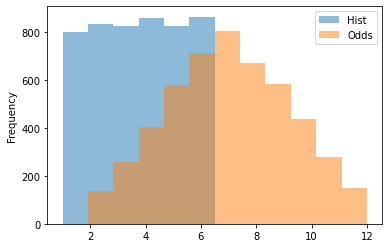

In [18]:
# Library usef to create advanced static, animated and
# interactive visualizations
import matplotlib.pyplot as plt

# Displays matplotlib plots in the Notebook
%matplotlib inline

# Histograms provide an approximation of the distribution of
# results. You create them by dividing the range of values into 
# bins or buckets. Then you count how many of the results fall
# into each bin.
# Rolls 2 dice 5000 times and charts the frequency and 
# a histogram

# Even though the odds increase as you approach 7 and then
# decrease again (1 way to roll a 2 / 6 ways to roll a 7)
# over many rolls they are nearly equal.
df_dice = pd.DataFrame(
    np.random.randint(1,7,5000),
    columns = ['Hist'])
df_dice['Odds'] = df_dice['Hist'] + np.random.randint(1,7,5000)
# Alpha decreases the opacity in the chart
ax = df_dice.plot.hist(bins=12, alpha=0.5)

# Basic plot using 1000 random values that create cumulative sums
# over an increasing date range
ser_5 = pd.Series(np.random.randn(1000),
                 index=pd.date_range('11/15/2017', periods=1000))
ser_5 = ser_5.cumsum()
# ser_5.plot()

# Display 3 random plots
df_15 = pd.DataFrame(np.random.randn(1000, 3),
                    index=pd.date_range('11/15/2017', periods=1000),
                    columns=list('ABC'))
df_15 = df_15.cumsum()
# df_15.plot()

# Make bar chart from 5 random values
# pd.DataFrame(np.random.randn(5)).plot.bar()

# Make MultiBar Charts
vals = ['A', 'B', 'C', 'D']
df_15 = pd.DataFrame(np.random.rand(10,4), columns=vals)
# df_15.plot.bar()

# Area plot 
# Define x range and y values
x_rng = range(1,15)
y_vals = [1,5,4,7,6,9,5,7,10,14,10,12,9,8]
# Change fill color and opacity
# plt.fill_between(x_rng, y_vals, color="skyblue", alpha=0.5)
# plt.show()

# Area plot with multiple areas
# pd.DataFrame(np.random.rand(10,3), columns=['A','B','C']).plot.area()

# Create a scatterplot with 100 random values
# pd.DataFrame(np.random.rand(100,2), 
#              columns=['A','B']).plot.scatter(x='A', y='B')

# Multiple column scatter plots
df_15 = pd.DataFrame(np.random.rand(50,4), columns=['A','B','C','D'])
# ax = df_15.plot.scatter(x='A', y='B', color='DarkBlue', label='Grp 1')
# df_15.plot.scatter(x='C', y='D', color='Orange', label='Grp 2', ax=ax)

# Pie Charts with 4 random values
# pd.Series(np.random.rand(4),
#          index=['a','b','c','d'], 
#           name='Pie').plot.pie(figsize=(6,6))